In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import utils as ut
import re
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [45]:
### Sólo utilizado para limpiar gpus y cpus
df_gpus = pd.read_csv('data/auxiliar/gpu_scoring.csv')
df_cpus = pd.read_csv('data/auxiliar/cpu_scoring.csv')
ut.gpu_cpu_clean(df_gpus,df_cpus)

In [46]:
# Lectura de archivos principales
df_port = pd.read_csv('data/train.csv',index_col=0)
df_gpus = pd.read_csv('data/auxiliar/gpu_clean.csv')
df_cpus = pd.read_csv('data/auxiliar/cpu_clean.csv')
df_company = pd.read_csv('data/auxiliar/company_price.csv')
df_type = pd.read_csv('data/auxiliar/type_price.csv')

In [47]:
# Limpieza de df train
df_port = ut.var_clean(df_port,df_gpus,df_cpus,df_company,df_type)
df_port.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               851 non-null    object 
 7   Ram               912 non-null    int64  
 8   Memory            912 non-null    int64  
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    float64
 12  Price_euros       912 non-null    float64
 13  company_price     912 non-null    float64
 14  type_price        912 non-null    float64
 15  screen_val        912 non-null    float64
 16  ips               912 non-null    int64  
 1

## Código para modelos

In [48]:
### Dos modelos: uno más genérico, y otro más selectivo con las variables dadas
### su correlación con la variable objetivo
df_port_float = df_port[['Ram','Weight','ssd','company_price','type_price','screen_val','ips','intel','ghz','cpu_score','gpu_score','linux','windows','mac','no os','Price_euros']]
df_port_float_sel = df_port[['Ram','Weight','ssd','company_price','type_price','screen_val','ips','ghz','cpu_score','gpu_score','windows','Price_euros']]

<Axes: >

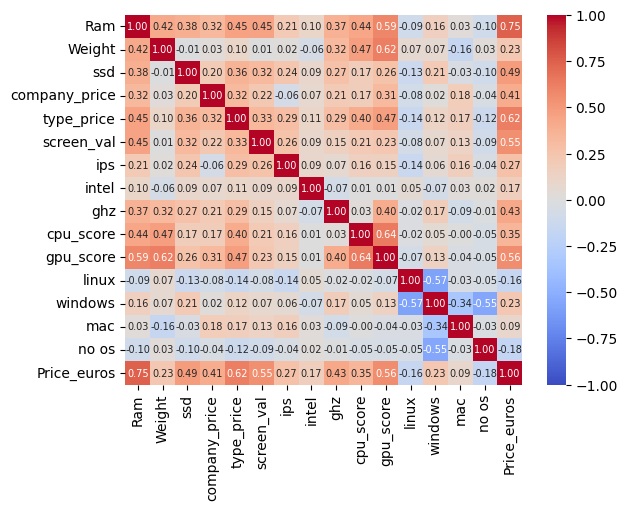

In [49]:
sns.heatmap(df_port_float.corr(), annot=True, cmap='coolwarm', vmin=-1,fmt='.2f', annot_kws = {'size': 7})

<Axes: >

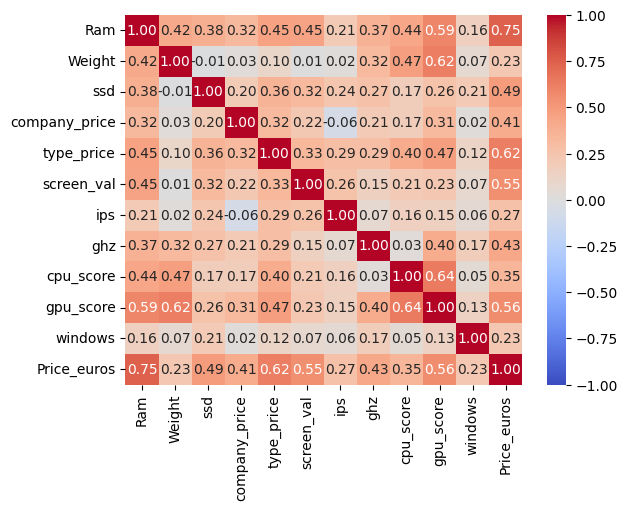

In [50]:
sns.heatmap(df_port_float_sel.corr(), annot=True, cmap='coolwarm', vmin=-1, fmt='.2f')

In [51]:
### Primera prueba con modelos. Vemos que polinómicos de muchos grados no aportan
print("Lineal sin scaler:\n\n",ut.lin_reg(df_port_float,polim=False,scaler=False,store_val=False))
print("."*50)
print("Lineal con scaler:\n\n",ut.lin_reg(df_port_float,polim=False,store_val=False))
print("."*50)
print("Polim 2:\n\n",ut.lin_reg(df_port_float,polim=True,deg=2,store_val=False))
print("."*50)
print("Polim 3:\n\n",ut.lin_reg(df_port_float,polim=True,deg=3,store_val=False))
print("."*50)
print("Polim 4:\n\n",ut.lin_reg(df_port_float,polim=True,deg=4,store_val=False))
print("."*50)
print("Polim 5:\n\n",ut.lin_reg(df_port_float,polim=True,deg=5,store_val=False))

MAE: 240.55274041390052
RMSE: 359.36365134792726
r2 train 0.7586823764229519
r2 test 0.7009946532487163
Cross validation results:
0.732229944005262 0.02552410266469205
Lineal sin scaler:

 None
..................................................
MAE: 240.55274041399497
RMSE: 359.36365134806846
r2 train 0.758682376422952
r2 test 0.7009946532484813
Cross validation results:
0.7322299440049974 0.02552410266549478
Lineal con scaler:

 None
..................................................
MAE: 245.59457499549995
RMSE: 353.1982949039968
r2 train 0.8771958247078362
r2 test 0.711166304824556
Cross validation results:
-1.226253530045199e+21 2.449978005006558e+21
Polim 2:

 None
..................................................
MAE: 339465484960.4278
RMSE: 2282492766553.5967
r2 train 0.9525771858152043
r2 test -1.2062282057374063e+19
Cross validation results:
-6.824831994126213e+20 8.32438594634045e+20
Polim 3:

 None
..................................................
MAE: 126180364324.17433
R

In [52]:
### Igual que arriba, con variables seleccionadas
print("Lineal sin scaler:\n\n",ut.lin_reg(df_port_float_sel,polim=False,scaler=False,store_val=False))
print("."*50)
print("Lineal con scaler:\n\n",ut.lin_reg(df_port_float_sel,polim=False,store_val=False))
print("."*50)
print("Polim 2:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=2,store_val=False))
print("."*50)
print("Polim 3:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=3,store_val=False))
print("."*50)
print("Polim 4:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=4,store_val=False))
print("."*50)
print("Polim 5:\n\n",ut.lin_reg(df_port_float_sel,polim=True,deg=5,store_val=False))


MAE: 236.98600577398952
RMSE: 359.5503368451927
r2 train 0.7497898258474397
r2 test 0.7006839125237456
Cross validation results:
0.7238693761753903 0.02809782299881551
Lineal sin scaler:

 None
..................................................
MAE: 236.98600577454525
RMSE: 359.5503368457451
r2 train 0.7497898258474397
r2 test 0.7006839125228261
Cross validation results:
0.7238693761740919 0.028097822999890512
Lineal con scaler:

 None
..................................................
MAE: 231.58522586481158
RMSE: 353.9531027775169
r2 train 0.8552144771185048
r2 test 0.7099304726846927
Cross validation results:
0.7177215068228142 0.10801406712722757
Polim 2:

 None
..................................................
MAE: 513.4292492153746
RMSE: 1246.9342850123442
r2 train 0.9500980645677706
r2 test -2.5999609695795747
Cross validation results:
-94.05007913689454 153.59007713512256
Polim 3:

 None
..................................................
MAE: 188601555757.66757
RMSE: 130828644

### Mejor modelo

In [53]:
### Sacamos cosas de los modelos que mejor pinta tienen
model, x1_train, y1_train, x1_test, y1_test,pol_feat,scaler = ut.lin_reg(df_port_float,polim=True,deg=2)
model2, x2_train, y2_train, x2_test, y2_test,scaler2 = ut.lin_reg(df_port_float,polim=False)
model3, x3_train, y3_train, x3_test, y3_test,pol_feat,scaler = ut.lin_reg(df_port_float,polim=True,deg=3)
model4, x4_train, y4_train, x4_test, y4_test,pol_feat,scaler = ut.lin_reg(df_port_float_sel,polim=True,deg=2)


MAE: 245.59457499549995
RMSE: 353.1982949039968
r2 train 0.8771958247078362
r2 test 0.711166304824556
Cross validation results:
-1.226253530045199e+21 2.449978005006558e+21
MAE: 240.55274041399497
RMSE: 359.36365134806846
r2 train 0.758682376422952
r2 test 0.7009946532484813
Cross validation results:
0.7322299440049974 0.02552410266549478
MAE: 339465484960.4278
RMSE: 2282492766553.5967
r2 train 0.9525771858152043
r2 test -1.2062282057374063e+19
Cross validation results:
-6.824831994126213e+20 8.32438594634045e+20
MAE: 231.58522586481158
RMSE: 353.9531027775169
r2 train 0.8552144771185048
r2 test 0.7099304726846927
Cross validation results:
0.7177215068228142 0.10801406712722757


In [54]:
### Aplicamos Gridsearch a Ridge
lm1r = Ridge(max_iter=2000)
gd = GridSearchCV(lm1r, param_grid={'alpha':np.logspace(-3,4,100).tolist()})
gd.fit(x1_train, y1_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

Ridge(alpha=4.750810162102793, max_iter=2000)
{'alpha': 4.750810162102793}
0.7674741039385756


In [55]:
### Aplicamos Gridsearch a Lasso
lm1l = Lasso(max_iter=3000)
gd = GridSearchCV(lm1l, param_grid={'alpha':np.logspace(-3,4,100).tolist()})
gd.fit(x1_train, y1_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

Lasso(alpha=4.750810162102793, max_iter=3000)
{'alpha': 4.750810162102793}
0.7538557170956194


### Gridsearch a ElasticNet

In [56]:
### Aplicamos Gridsearch a elasticnet
lm1en = ElasticNet(max_iter=3000)
gd = GridSearchCV(lm1en, param_grid={'alpha':np.logspace(-3,4,100).tolist(),'l1_ratio' : np.arange(0.1,1,0.1).tolist()})
gd.fit(x4_train, y4_train)
print(gd.best_estimator_)
print(gd.best_params_)
print(gd.best_score_)

ElasticNet(alpha=0.01873817422860384, l1_ratio=0.2, max_iter=3000)
{'alpha': 0.01873817422860384, 'l1_ratio': 0.2}
0.7488565249964552


In [57]:
### Creamos modelo con mejor alpha y l1
lm1en = ElasticNet(alpha = 0.015922827933410922,l1_ratio = 0.2,max_iter=10000)
lm1en.fit(x4_train, y4_train)
pred1en = lm1en.predict(x4_test)
print('MAE:', metrics.mean_absolute_error(y4_test, pred1en))
print('RMSE:', metrics.root_mean_squared_error(y4_test, pred1en))
print('='*20)
print('r2 train',lm1en.score(x4_train,y4_train))
print('r2 test',lm1en.score(x4_test,y4_test))
print(pred1en[:5])

MAE: 222.11878127283535
RMSE: 338.77711005362085
r2 train 0.834960812694344
r2 test 0.7342711073997222
[1576.13617843 1108.97473113  884.23302591  907.0653655  1381.77690828]


### Otros algoritmos

In [58]:
### XGboost, de caja
params = {
    "n_estimators": 5000,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.3
}
xgb = GradientBoostingRegressor(**params)
xgb.fit(x2_train, y2_train)
predxgb = xgb.predict(x2_test)
print('MAE:', metrics.mean_absolute_error(y2_test, predxgb))
print('RMSE:', metrics.root_mean_squared_error(y2_test, predxgb))
print('='*20)
print('r2 train',xgb.score(x2_train,y2_train))
print('r2 test',xgb.score(x2_test,y2_test))

MAE: 194.1521497088156
RMSE: 296.517826657808
r2 train 0.9090977992009107
r2 test 0.796430703250868


In [59]:
### XGboost, tras polim 2
params = {
    "n_estimators": 5000,
    "max_depth": 10,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.25
}
xgb = GradientBoostingRegressor(**params)
xgb.fit(x4_train, y4_train)
predxgb = xgb.predict(x4_test)
print('MAE:', metrics.mean_absolute_error(y4_test, predxgb))
print('RMSE:', metrics.root_mean_squared_error(y4_test, predxgb))
print('='*20)
print('r2 train',xgb.score(x4_train,y4_train))
print('r2 test',xgb.score(x4_test,y4_test))


MAE: 175.3298142165433
RMSE: 275.52437861962403
r2 train 0.9693189574447637
r2 test 0.8242356780951531


In [60]:
### Cross val de xgboost
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(xgb, x4_train, y4_train, cv=kfold)
print('='*20)
print('Cross validation results:')
print(cv_results.mean(), cv_results.std())

Cross validation results:
0.8360672406216374 0.03907377141976756


In [61]:
### Intentamos regularizar. Aumentamos estimators, reducimos learning rate
params = {
    "n_estimators": 5000,
    "max_depth": 2,
    "min_samples_split": 5,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "subsample": 0.8
}
xgb1 = GradientBoostingRegressor(**params)
xgb1.fit(x1_train, y1_train)
predxgb1 = xgb1.predict(x1_test)
print('MAE:', metrics.mean_absolute_error(y1_test, predxgb1))
print('RMSE:', metrics.root_mean_squared_error(y1_test, predxgb1))
print('='*20)
print('r2 train',xgb1.score(x1_train,y1_train))
print('r2 test',xgb1.score(x1_test,y1_test))

MAE: 214.06481948681724
RMSE: 315.7059966992317
r2 train 0.8771405451028726
r2 test 0.7692316089086281


In [62]:
### xgboost con gridsearch

# Define el modelo
xgbrd = RandomForestRegressor(random_state=42)

# Configura la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],       # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]          # Número mínimo de muestras en un nodo hoja
}

# Definir el scorer como Mean Absolute Error (MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Configurar GridSearchCV con el modelo, los hiperparámetros y el scorer
grid_search = GridSearchCV(estimator=xgbrd, param_grid=param_grid, 
                           scoring=mae_scorer, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(x1_train, y1_train)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor MAE:", -grid_search.best_score_)  # Convierte a positivo

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores parámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor MAE: 185.82861097785693


In [63]:
### Random Forest - último intento
### max_depth=20,
rfor = RandomForestRegressor(criterion='absolute_error',random_state=42,n_estimators = 300 )
rfor.fit(x3_train, y3_train)
predrfor = rfor.predict(x3_test)
print('MAE:', metrics.mean_absolute_error(y3_test, predrfor))
print('RMSE:', metrics.root_mean_squared_error(y3_test, predrfor))
print('='*20)
print('r2 train',rfor.score(x3_train,y3_train))
print('r2 test',rfor.score(x3_test,y3_test))

MAE: 186.7138737704918
RMSE: 308.8335872641474
r2 train 0.9748906396654307
r2 test 0.7791691664139044


## Aplicación en ds test

In [65]:
df_test = pd.read_csv('data/test.csv',index_col=0).sort_index()
df_test.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
id,,,,,,,,,,,,
6,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg
8,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8GB,500GB HDD,AMD FirePro W5130M,Windows 10,2.23kg
14,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg
21,606,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620,Windows 10,2.06kg
22,522,Asus,VivoBook E12,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg


In [66]:
### Dataset test
df_test = ut.var_clean(df_test,df_gpus,df_cpus,df_company,df_type)
df_test.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,name_x,cpu_score,name_y,gpu_score,linux,windows,mac,no os,ssd,hdd
0,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,intel core i7 7600u,16,256,geforce 930mx,...,intel core i7 7600u,3701.000000,geforce 930mx,1288.000000,0,1,0,0,1,0
1,393,Dell,Precision 3510,Workstation,15.6,Full HD 1920x1080,intel core i5 6440hq,8,500,firepro w5130m,...,intel core i5 6440hq,5103.000000,firepro w5130m,1410.000000,0,1,0,0,0,1
2,1081,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,intel core i7 6820hk,64,1000,geforce gtx 980,...,intel core i7 6820hk,7063.000000,NaN,2285.819945,0,1,0,0,1,0
3,606,Dell,Precision 3520,Workstation,15.6,Full HD / Touchscreen 1920x1080,intel core i7 7700hq,8,256,quadro m620,...,intel core i7 7700hq,6909.000000,quadro m620,2795.000000,0,1,0,0,1,0
4,522,Asus,VivoBook E12,Netbook,11.6,1366x768,intel celeron dual core n3350,2,32,intel hd 500,...,NaN,4652.348387,intel hd 500,299.000000,0,1,0,0,0,0


In [67]:
x_test_test=df_test[['Ram','Weight','ssd','company_price','type_price','screen_val','ips','ghz','cpu_score','gpu_score','windows']].copy()
x_test_test = pol_feat.transform(x_test_test)
x_test_test=scaler.transform(x_test_test)
pred_test = xgb.predict(x_test_test)
pred_test[:5]


array([1620.71267997, 1771.77888838, 3217.40142907, 2044.09998014,
        351.29683502])

### Generación a csv

In [68]:
df_results = pd.read_csv('data/sample_submission.csv',index_col=0).sort_index()
df_results['Price_euros'] = pred_test
df_results.to_csv('data/results/results.csv')
df_results

,Price_euros
id,
6,1620.712680
8,1771.778888
14,3217.401429
21,2044.099980
22,351.296835
...,...
1281,1039.992057
1285,1275.967419
1286,1619.016473


In [69]:
df_port.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,name_x,cpu_score,name_y,gpu_score,linux,windows,mac,no os,ssd,hdd
0,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,intel core i7 7500u,8,1000,radeon r7 m445,...,intel core i7 7500u,3646.000000,radeon r7 m445,943.0,0,1,0,0,0,1
1,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,intel pentium quad core n4200,4,1000,intel hd 505,...,NaN,4489.436782,intel hd 505,360.0,0,1,0,0,0,1
